In [4]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import nlpaug.augmenter.word as naw
import nlpaug
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as naf
from gensim.models.keyedvectors import KeyedVectors
from nlpaug.util.file.download import DownloadUtil
from datetime import datetime
from utils.helpers import *
import json

In [5]:
# import gzip
# import shutil
# with gzip.open('models/GoogleNews-vectors-negative300.bin.gz', 'rb') as f_in:
#     with open('models/GoogleNews-vectors-negative300.bin', 'wb') as f_out:
#         shutil.copyfileobj(f_in, f_out)

In [6]:
# DownloadUtil.download_glove(model_name='glove.6B', dest_dir='models/.')

# Testing

In [7]:
text = 'The language used by partners is very friendly and polite and easy to understand, the connection is also smooth'

In [8]:
bt_zh = naw.BackTranslationAug(
    from_model_name='Helsinki-NLP/opus-mt-en-zh', 
    to_model_name='Helsinki-NLP/opus-mt-zh-en'
)
print(bt_zh.augment(text))

The language used by the partner is very friendly, polite and easy to understand, and communication is smooth.


In [9]:
bt_de = naw.BackTranslationAug()
print(bt_de.augment(text))

The language of the partners is very friendly and polite and easy to understand, also the connection is smooth.


In [10]:
bt_ja = naw.BackTranslationAug(
    from_model_name='Helsinki-NLP/opus-tatoeba-en-ja', 
    to_model_name='Helsinki-NLP/opus-mt-ja-en'
)
print(bt_ja.augment(text))

The language your partner uses is very kind, polite, and easy to understand. The connection is smooth.


In [11]:
roberta = naw.ContextualWordEmbsAug(
    model_path='roberta-base', action='substitute', aug_max=3)
roberta.augment(text,n=2)

['The language used by partners be very friendly in polite and easy people understand, the connection is also smooth',
 'The driver used by partners is generally friendly and polite and easy to speak, the connection is also smooth']

In [12]:
aug = naf.Sometimes([bt_zh, bt_de, bt_ja, roberta], aug_p=0.5)

aug.augment(text, n=3)

['The language your partner uses is very straightforward, polite, and difficult to grasp. The connection is smooth.',
 'The language used between my partner is very friendly, polite yet easy to understand, and communication is smooth.',
 'The language used by the partner is very friendly, polite and easy to understand, and communication is smooth.']

# Create Synthetic Data

In [13]:
handlabel_df = pd.read_csv('../data/handlabel.csv').reset_index(drop=True)
handlabel_df.head(2)

,sequence,communication,waiting time,information,user interface,facilities,location,price,sentiment
0,satisfied with the answer,0,0,1,0,0,0,0,1
1,Friendly employee,1,0,0,0,0,0,0,1


<AxesSubplot:>

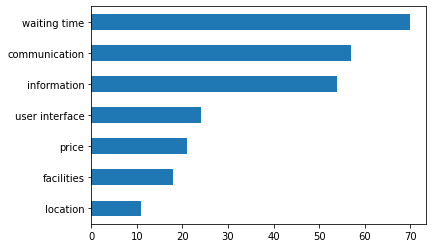

In [14]:
handlabel_df[[ 'communication',
    'waiting time',
     'information',
    'user interface',
    'price',
    'location',
    'facilities']].sum().sort_values().plot(kind='barh')

In [16]:
print(datetime.datetime.now().strftime("%d-%m-%Y %H:%M:%S"))

08-03-2022 21:46:13


In [17]:
user_interface = augment_data(handlabel_df, aug, 'user interface', 10)

Processing row 1 out of 24 now...
Processing row 2 out of 24 now...
Processing row 3 out of 24 now...
Processing row 4 out of 24 now...
Processing row 5 out of 24 now...
Processing row 6 out of 24 now...
Processing row 7 out of 24 now...
Processing row 8 out of 24 now...
Processing row 9 out of 24 now...
Processing row 10 out of 24 now...
Processing row 11 out of 24 now...
Processing row 12 out of 24 now...
Processing row 13 out of 24 now...
Processing row 14 out of 24 now...
Processing row 15 out of 24 now...
Processing row 16 out of 24 now...
Processing row 17 out of 24 now...
Processing row 18 out of 24 now...
Processing row 19 out of 24 now...
Processing row 20 out of 24 now...
Processing row 21 out of 24 now...
Processing row 22 out of 24 now...
Processing row 23 out of 24 now...
Processing row 24 out of 24 now...
Rows added: 240
Shape of resulting dataframe: (240, 9)


In [18]:
print(datetime.datetime.now().strftime("%d-%m-%Y %H:%M:%S"))

08-03-2022 22:38:05


In [19]:
facilities = augment_data(handlabel_df, aug, 'facilities', 20)

Processing row 1 out of 18 now...
Processing row 2 out of 18 now...
Processing row 3 out of 18 now...
Processing row 4 out of 18 now...
Processing row 5 out of 18 now...
Processing row 6 out of 18 now...
Processing row 7 out of 18 now...
Processing row 8 out of 18 now...
Processing row 9 out of 18 now...
Processing row 10 out of 18 now...
Processing row 11 out of 18 now...
Processing row 12 out of 18 now...
Processing row 13 out of 18 now...
Processing row 14 out of 18 now...
Processing row 15 out of 18 now...
Processing row 16 out of 18 now...
Processing row 17 out of 18 now...
Processing row 18 out of 18 now...
Rows added: 360
Shape of resulting dataframe: (360, 9)


In [20]:
print(datetime.datetime.now().strftime("%d-%m-%Y %H:%M:%S"))

08-03-2022 23:59:06


In [21]:
price = augment_data(handlabel_df, aug, 'price', 20)

Processing row 1 out of 21 now...
Processing row 2 out of 21 now...
Processing row 3 out of 21 now...
Processing row 4 out of 21 now...
Processing row 5 out of 21 now...
Processing row 6 out of 21 now...
Processing row 7 out of 21 now...
Processing row 8 out of 21 now...
Processing row 9 out of 21 now...
Processing row 10 out of 21 now...
Processing row 11 out of 21 now...
Processing row 12 out of 21 now...
Processing row 13 out of 21 now...
Processing row 14 out of 21 now...
Processing row 15 out of 21 now...
Processing row 16 out of 21 now...
Processing row 17 out of 21 now...
Processing row 18 out of 21 now...
Processing row 19 out of 21 now...
Processing row 20 out of 21 now...
Processing row 21 out of 21 now...
Rows added: 420
Shape of resulting dataframe: (420, 9)


In [22]:
print(datetime.datetime.now().strftime("%d-%m-%Y %H:%M:%S"))

09-03-2022 01:39:17


In [23]:
location = augment_data(handlabel_df, aug, 'location', 20)

Processing row 1 out of 11 now...
Processing row 2 out of 11 now...
Processing row 3 out of 11 now...
Processing row 4 out of 11 now...
Processing row 5 out of 11 now...
Processing row 6 out of 11 now...
Processing row 7 out of 11 now...
Processing row 8 out of 11 now...
Processing row 9 out of 11 now...
Processing row 10 out of 11 now...
Processing row 11 out of 11 now...
Rows added: 220
Shape of resulting dataframe: (220, 9)


In [24]:
print(datetime.datetime.now().strftime("%d-%m-%Y %H:%M:%S"))

09-03-2022 02:35:37


In [25]:
information = augment_data(handlabel_df, aug, 'information', 10)

Processing row 1 out of 54 now...
Processing row 2 out of 54 now...
Processing row 3 out of 54 now...
Processing row 4 out of 54 now...
Processing row 5 out of 54 now...
Processing row 6 out of 54 now...
Processing row 7 out of 54 now...
Processing row 8 out of 54 now...
Processing row 9 out of 54 now...
Processing row 10 out of 54 now...
Processing row 11 out of 54 now...
Processing row 12 out of 54 now...
Processing row 13 out of 54 now...
Processing row 14 out of 54 now...
Processing row 15 out of 54 now...
Processing row 16 out of 54 now...
Processing row 17 out of 54 now...
Processing row 18 out of 54 now...
Processing row 19 out of 54 now...
Processing row 20 out of 54 now...
Processing row 21 out of 54 now...
Processing row 22 out of 54 now...
Processing row 23 out of 54 now...
Processing row 24 out of 54 now...
Processing row 25 out of 54 now...
Processing row 26 out of 54 now...
Processing row 27 out of 54 now...
Processing row 28 out of 54 now...
Processing row 29 out of 54 n

In [26]:
print(datetime.datetime.now().strftime("%d-%m-%Y %H:%M:%S"))

09-03-2022 04:39:00


In [27]:
communication = augment_data(handlabel_df, aug, 'communication', 10)

Processing row 1 out of 57 now...
Processing row 2 out of 57 now...
Processing row 3 out of 57 now...
Processing row 4 out of 57 now...
Processing row 5 out of 57 now...
Processing row 6 out of 57 now...
Processing row 7 out of 57 now...
Processing row 8 out of 57 now...
Processing row 9 out of 57 now...
Processing row 10 out of 57 now...
Processing row 11 out of 57 now...
Processing row 12 out of 57 now...
Processing row 13 out of 57 now...
Processing row 14 out of 57 now...
Processing row 15 out of 57 now...
Processing row 16 out of 57 now...
Processing row 17 out of 57 now...
Processing row 18 out of 57 now...
Processing row 19 out of 57 now...
Processing row 20 out of 57 now...
Processing row 21 out of 57 now...
Processing row 22 out of 57 now...
Processing row 23 out of 57 now...
Processing row 24 out of 57 now...
Processing row 25 out of 57 now...
Processing row 26 out of 57 now...
Processing row 27 out of 57 now...
Processing row 28 out of 57 now...
Processing row 29 out of 57 n

In [28]:
print(datetime.datetime.now().strftime("%d-%m-%Y %H:%M:%S"))

09-03-2022 06:34:20


In [29]:
waiting_time = augment_data(handlabel_df, aug, 'waiting time', 10)

Processing row 1 out of 70 now...
Processing row 2 out of 70 now...
Processing row 3 out of 70 now...
Processing row 4 out of 70 now...
Processing row 5 out of 70 now...
Processing row 6 out of 70 now...
Processing row 7 out of 70 now...
Processing row 8 out of 70 now...
Processing row 9 out of 70 now...
Processing row 10 out of 70 now...
Processing row 11 out of 70 now...
Processing row 12 out of 70 now...
Processing row 13 out of 70 now...
Processing row 14 out of 70 now...
Processing row 15 out of 70 now...
Processing row 16 out of 70 now...
Processing row 17 out of 70 now...
Processing row 18 out of 70 now...
Processing row 19 out of 70 now...
Processing row 20 out of 70 now...
Processing row 21 out of 70 now...
Processing row 22 out of 70 now...
Processing row 23 out of 70 now...
Processing row 24 out of 70 now...
Processing row 25 out of 70 now...
Processing row 26 out of 70 now...
Processing row 27 out of 70 now...
Processing row 28 out of 70 now...
Processing row 29 out of 70 n

In [30]:
print(datetime.datetime.now().strftime("%d-%m-%Y %H:%M:%S"))

09-03-2022 09:09:34


# Amalgamating Synthetic and Real Data

In [31]:
handlabel_augmented = pd.concat([handlabel_df, user_interface, facilities, price, location, information, communication, waiting_time]).drop_duplicates(subset=['sequence'])

<AxesSubplot:>

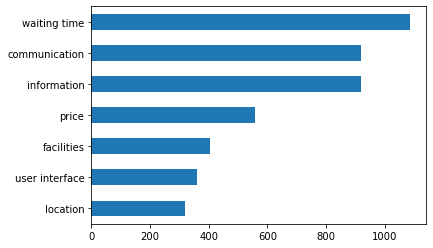

In [32]:
handlabel_augmented[['communication',
    'waiting time',
    'information',
    'user interface',
    'price',
    'location',
    'facilities']].sum().sort_values().plot(kind='barh')

In [33]:
handlabel_augmented.to_csv('../data/handlabel_augmented.csv', index=False)